<a href="https://ibb.co/vdJTBVf"><img src="https://i.ibb.co/SmKMx5H/trinity-common-use.jpg" alt="trinity-common-use" border="0"></a>

TYPE AI session - March 2025

[Quantum Materials Dynamics Group](https://www.tcd.ie/physics/research/groups/quantum-materials-dynamics/), School of Physics, Trinity College Dublin

If you have any questions or need further assistance, please don't hesitate to reach out to Zahra at:
<!-- [lunghia@tcd.ie](mailto:lunghia@tcd.ie), -->
[khatibiz@tcd.ie](mailto:khatibiz@tcd.ie)






---


# **How Artificial Intelligence can help with material discovery!**
# Practice Lab: AI for photo Recognition

In this exercise, you'll train an AI model to tell apart photos of chihuahuas and muffins. It might seem odd, and unrelated to material discovery, but it highlights how AI can quickly scan and study millions of data set including molecular structures, and use material features to identify structures with favoured properties. By the end of this lab, you will see the relevance better.

Now why chihuahua and muffins you may ask. Because awhile ago, this basic test revealed flaws in AI methods, emphasizing the need for improved accuracy.


<a href="https://ibb.co/WVcTcxz"><img src="https://i.ibb.co/MBRXR21/logo.jpg" alt="logo" border="0"></a>

<small>© Getty Images

<!-- <img src="https://previews.dropbox.com/p/thumb/ACLmgn4eB68fMErekda5ED1MeeRkKp8KImY3z3RFiz3712lDZx_S6dv3lfLetPtKdBZpTWIys-qypR_BVcht5ys42UJR5o1KbS_AoHbr-fv4ZQUtoeq-z-2sl8_wVp4G07Sks5lTQC6EMPQu_nf3zQvToOW6rNQI2sqHVaSl1edFx26mrjVaTXpLA6eMeCORIfZUJWc_bR32UXvC73L06h90H_6WSfAcgnO1pYeEN7J4620kjnUxo6V_AsHWDz-HQOfdK8fu1EwcG1-UCToNr2iaSn4GRc8umv6uVDvc8cOwmq4Jm6xR8fnzMmASe4fwKgXnBBhZWuNnGEJpWimYApcE/p.jpeg" width="600"> -->


#Step one: Load the dataset
1.   Import the required packages for the machine learning code.
2.   Download and save the images for later processing.


Simply click the play button (▶) next to the code blocks to execute. Wait for the images to download. You'll notice a folder named 'data' appear in the left panel. This folder stores your data and images.

In [ ]:
import requests
import tarfile
import io
from tqdm import tqdm
import os
import random
import matplotlib.pyplot as plt
import glob
import pathlib
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import timeit
starttime = timeit.default_timer()

dataset_url = "https://www.dropbox.com/scl/fi/yp82nb8ztui5mgg2isf5j/chihuahuavsmuffin2.tgz?rlkey=phcmfzhc18rjnz26u3c81wmo0&st=tcct7zxm&dl=1"
# dataset_url = "https://www.dropbox.com/scl/fi/1o1ijs6paibglpbe2buot/chihuahuavsmuffin2.tgz?rlkey=thfg4hao9r9h2wp1v8uyilo7o&st=wh3beedm&dl=1"

# Download the dataset file
response = requests.get(dataset_url, stream=True)

if response.status_code == 200:
    total_size = int(response.headers.get('content-length', 0))
    block_size = 1024  # 1 KB
    progress_bar = tqdm(total=total_size, unit='B', unit_scale=True)
    with open('/content/chihuahuavsmuffin2.tgz', 'wb') as f:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            f.write(data)
    progress_bar.close()

    # Extract the contents of the tarball
    with tarfile.open('/content/chihuahuavsmuffin2.tgz', mode="r:gz") as tar:
        tar.extractall("/content/data")
else:
    print("Failed to download the dataset.")

data_dir = pathlib.Path('/content/data/chihuahuavsmuffin/')

100%|██████████| 318M/318M [00:06<00:00, 46.3MB/s]
/tmp/ipython-input-3066679656.py:37: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall("/content/data")


#Step two: Choose the number of images for training the model
Run the code below and choose a number when prompted. This number represents the amount of images you want to train your algorithm with. Let's begin with **400** images.






In [ ]:
def ds_split(num, batch_size, img_height, img_width):

    image_count = len(list(data_dir.glob('**/*.jpg')))
    if num > image_count:
      print('We do not have this many photos, sorry! Rerun the code block again and retry with a smaller number :)')
      return
    elif num < 5:
      print('This is not a valid number. Rerun the code block again and retry with a number between 5 and 3747.')
      return
    else:
      #print('Total number of images is {}'.format(image_count))
      val_pop = int(.2*num)
      train_pop = num - val_pop
      val_per_real = val_pop/image_count
      train_per = train_pop/image_count
      val_per_fake =abs(1-(train_pop)/image_count)

      train_ds = tf.keras.utils.image_dataset_from_directory(
          data_dir,
          validation_split= val_per_fake,
          subset="training",
          seed=123,
          image_size=(img_height, img_width),
          batch_size=batch_size)

      val_ds = tf.keras.utils.image_dataset_from_directory(
          data_dir,
          validation_split=val_per_real,
          subset="validation",
          seed=123,
          image_size=(img_height, img_width),
          batch_size=batch_size)
    return train_ds, val_ds

# Prompt the user for input
num = int(input("Please enter the total number of images for training (should be less than 3747): "))

# Call the function with user input
batch_size, img_height, img_width = 32, 50, 50
train_ds, val_ds = ds_split(num, batch_size, img_height, img_width)

class_names = train_ds.class_names
print('The {} class of images are:{}'.format(len(class_names),class_names))

Please enter the total number of images for training (should be less than 3747): 400
Found 3747 files belonging to 2 classes.
Using 320 files for training.
Found 3747 files belonging to 2 classes.
Using 80 files for validation.
The 2 class of images are:['chihuahua', 'muffin']


#Step three: View the images
You already know what the images are. Now, let's take a look at some of them. Go ahead and run the next code block.

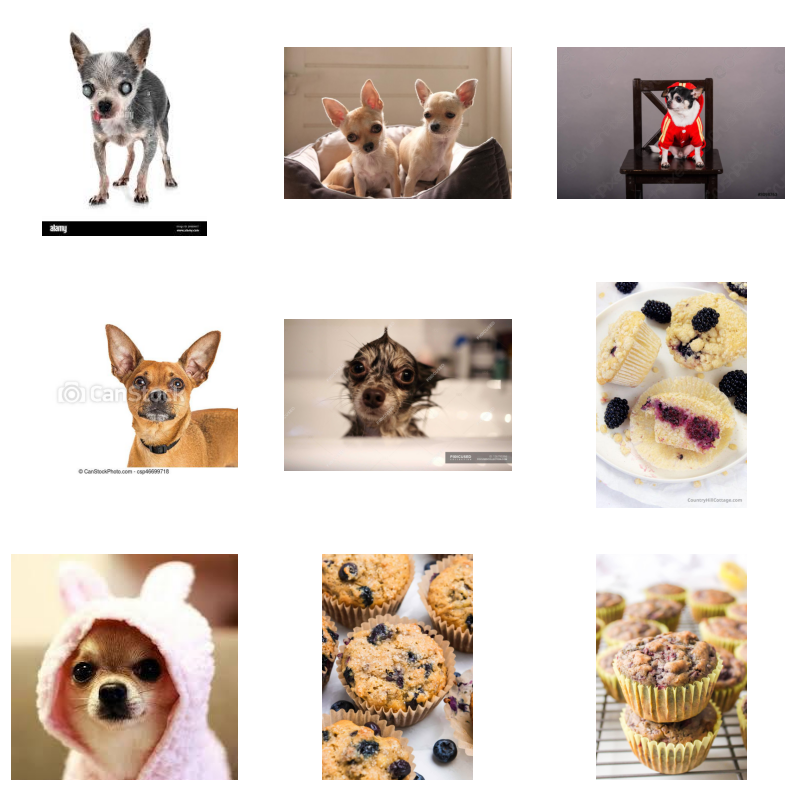

In [ ]:
directory = "data/"
files = glob.glob(os.path.join(directory, '**/*.jpg'), recursive=True)
selected_files = random.sample(files, 9)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, file in enumerate(selected_files):
    img = PIL.Image.open(file)
    ax = axes[i//3, i%3]
    ax.imshow(img)
    ax.axis('off')

plt.show()


#Step four: Compile and run the AI model
In this step we will train our photo recognition model. This will take a while, so make sure to wait for the code to run properly. Once it's finished, you should see results like this:
```
Epoch 10/10
10/10 [==============================] - 1s 76ms/step - loss: 0.2710 - accuracy: 0.8781 - val_loss: 0.5767 - val_accuracy: 0.8125
 The training is done!
```



In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(int(num)).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#model.summary()

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
)

print (' The training is done! ')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.4715 - loss: 0.7185 - val_accuracy: 0.5375 - val_loss: 0.6872
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5481 - loss: 0.6851 - val_accuracy: 0.6125 - val_loss: 0.6618
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.7006 - loss: 0.6241 - val_accuracy: 0.6750 - val_loss: 0.5878
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.7703 - loss: 0.5231 - val_accuracy: 0.7125 - val_loss: 0.5780
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.7795 - loss: 0.4558 - val_accuracy: 0.7250 - val_loss: 0.5089
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8527 - loss: 0.3775 - val_accuracy: 0.7625 - val_loss: 0.5042
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8654 - loss: 0.3414 - val_accuracy: 0.7500 - val_loss: 0.4815
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8723 - loss: 0.3022 - val_accuracy: 0.7500 - val_loss: 0

#Step five: Test the trained model:
Now that we have a trained model, let's test it with a new image that wasn't part of the training set. The image closely resembles a chihuahua's face, but let's see if the model can correctly identify whether it's a muffin ;)


<a href="https://ibb.co/rM37Rn1"><img src="https://i.ibb.co/5vkMgqf/image832.png" alt="image832" border="0" width="300"></a>

<!-- <img src="https://previews.dropbox.com/p/thumb/ACJS4PHraXXhczMI8JoeZdKWwHht3lD5GOz8L_00YM9zxLxEfZg-yokpXTOyNcJBrRCOJASuzGgQ8ebhO5Eak6QZdgkwQjEtZUZ2le5Jj8mDUemieGZIAo5EbTvGlyvYdw7fwlt3olZtuHE2Es8ixH20SsS5sAAJwqO6q6tu-x7xUgQb7Am9ZKH5PBhGzqtBY6HrWjoYf5a_aisQfOqS2FPUclEPP2-2YFi--TPKd9-pf7d2a4bsDnk95YGt_JJSKGCBW84tRLO2oH6LeRTcyMRpBks4DloYTvm2Lhw-m7BucYa0vzByFELA2YZxWcn_8pWWWti6ZqEcznpPTjcOnnZC/p.png" width="300"> -->
<small> © Getty Images

In [ ]:
response = requests.get("https://www.dropbox.com/scl/fi/m3f3hvmtktqdkj72uhejz/image832.png?rlkey=wut4m0543e2g1zfylufb4099s&dl=1")
with open("test1.png", "wb") as f:
  f.write(response.content)

  test_path=pathlib.Path('./test1.png')

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# print ('The training is done in {}!'.format((timeit.default_timer() - starttime)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
This image most likely belongs to muffin with a 57.42 percent confidence.


# Step Six: Increase number of images in the training set, get better results
How accurate was the prediction? Do you agree with the model's assessment? No? If not, perhaps the model didn't train on enough images. Let's check. Return to Step two and this time enter **3747** in the input box. You don't need to run all the code blocks again, just compile the model (Step four) and test it (Step five).

# Step Seven: image augmentation, improving the results (**Optional**)
The model has already nailed the answer but if it didn't, we could still improve the model with a bit of modification. Picture the model like a toddler learning about objects. If they understand what a chair looks like from one angle, they might still recognize it when it's upside down. For an AI model, this is more challenging. One way to improve the model is by diversifying the dataset through techniques like rotating or mirroring images, i.e. image augmentation.

Run the code below to see an example of image augmentation, then proceed to train the model with the modified dataset.

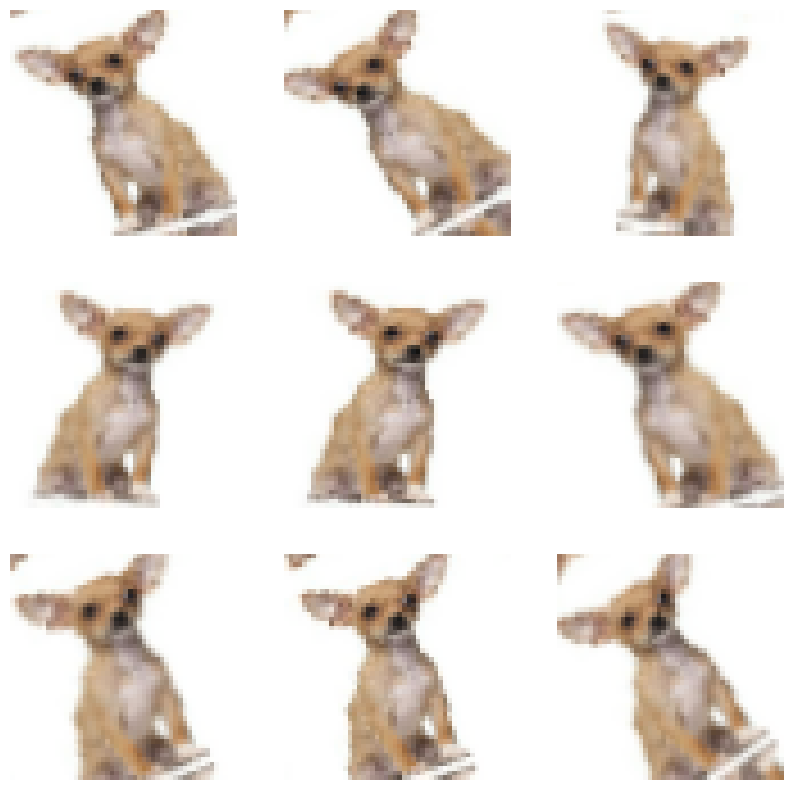

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


print (' The training is done! ')

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.6128 - loss: 0.6613 - val_accuracy: 0.7797 - val_loss: 0.5003
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.7810 - loss: 0.4878 - val_accuracy: 0.7250 - val_loss: 0.5807
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.7996 - loss: 0.4601 - val_accuracy: 0.7917 - val_loss: 0.4691
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8118 - loss: 0.4134 - val_accuracy: 0.8344 - val_loss: 0.3936
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.8297 - loss: 0.3760 - val_accuracy: 0.8425 - val_loss: 0.3480
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8366 - loss: 0.3700 - val_accuracy: 0.7824 - val_loss: 0.5253
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.8436 - loss: 0.3520 - val_accuracy: 0.8278 - val_loss: 0.3802
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.8427 - loss: 0.3416 - val_accuracy:

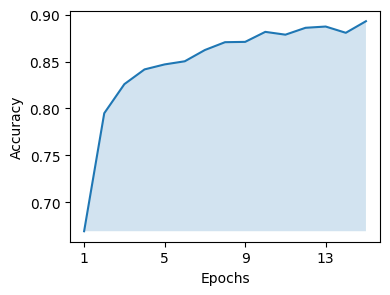

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1,epochs+1)

plt.figure(figsize=(4,3))
plt.subplot(111)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.fill_between(epochs_range, acc, min(acc), alpha=.2)
plt.xticks([1, 5, 9, 13])
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

Let's put our model to the test once more using the muffin image to see if we've made any improvements.

In [ ]:
img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
This image most likely belongs to a muffin with a 75.98 percent confidence.


# Final remarks:

<!-- <a href="https://ibb.co/pKDrZ0b"><img src="https://i.ibb.co/6thJbnr/slide1.png" alt="slide1" border="0" width="900"></a> -->

<a href="https://ibb.co/kh7HxfQ"><img src="https://i.ibb.co/sFfm2Gy/slide1.png" alt="slide1" border="0"></a>

<!-- ![new](https://previews.dropbox.com/p/thumb/ACLuslZ26eii-aYVF4LaS86Skg3x5osNYIoO7WPQU5mvpmBrcmwZINEQkTcioCcdcG4n6J7-4rfFwZyuWqkx4Zsgk420jJ78NnDQS2BISzJh50OFKIZ7n5Kcs7hoOv65xctF-L6sZwxKaPk_iN5kaYC7r0MZnvt7xPtKubRffDaNQtSTQhktKV0d5EplC4_jxolJKSTw2yGAkezcgIN6pCE5fCMrT4iVxsm6csber8CFZSNZnWQFK0J2yWxKDJ9dEn-W-fYcMmin1NbjJvhB1lYGjhZOMot67thibqydG5b_FyV6JKw8Lk_Fn6n0Jjge6B1qaMOhGPd9wXScN_EdsTEt/p.png) -->


# Testing the Limits of Your AI Model
Now that you’ve trained your AI to recognize chihuahuas and muffins, let’s see what happens when we give it something completely different!

Try this:
Use the follwoing image of a Herrerasaurus and test your model. Run the next code block!

<a href="https://ibb.co/dJxhtzLW"><img src="https://i.ibb.co/dJxhtzLW/dino.jpg" alt="dino" border="0" width="300"></a>

<small>© Fred Wierum/Wikimedia Commons

In [ ]:
response = requests.get("https://www.dropbox.com/scl/fi/q5yv9liwz9pdkl3f8gwnk/dino.jpg?rlkey=diijim222r6w9cj2qyr95sgjr&st=05wv06kz&dl=1")
with open("dino.jpg", "wb") as f:
  f.write(response.content)

  test_path=pathlib.Path('./dino.jpg')

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This image most likely belongs to chihuahua with a 79.52 percent confidence.



What do you notice?
The AI will still try to classify it as either a chihuahua or a muffin—even though it’s clearly neither!

👉 This shows that AI can only recognize what it has been trained on. If it hasn’t seen something before, it won’t know how to handle it properly.



Looking for some more? Probably tricking the model and have a bit of laugh?
Go on then, try this one :D

<a href="https://ibb.co/DQZwXgq"><img src="https://i.ibb.co/HqjGvpJ/image.png" alt="image" border="0" width="200"></a>

In [ ]:
response = requests.get("https://www.dropbox.com/scl/fi/qcnbjmrb2c8exp1yfwd40/image.png?rlkey=3w06zbjjulb0ri3420e4b5zj8&dl=1")
with open("test2.png", "wb") as f:
  f.write(response.content)

  test_path=pathlib.Path('./test2.png')

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This image most likely belongs to muffin with a 99.13 percent confidence.
